# Alpha 030 之方法論

此檔案紀錄我對於Alpha030的一些學習過程以及實際操作上的想法、問題，以及驗證後的結果。

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd

import talib

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')

## Load Data

對於資料的操作部分：

我使用yf.download 去下載了S&P500 從'2000-01-01', '2022-08-31'的歷史資料
並且存成'S&P500.h5' 之hdf資料格式

以下先把資料讀進來

In [4]:
data = pd.read_hdf('C:\\Users\\2022080101\\data\\S&P500.h5', 'S&P500')

In [5]:
data

Adj Close       Close        High         Low        Open  \
    Date                                                                     
A   1999-12-31   47.400246   55.302216   57.179901   54.542202   56.866955   
    2000-01-03   44.143158   51.502148   56.464592   48.193848   56.330471   
    2000-01-04   40.771103   47.567955   49.266811   46.316166   48.730328   
    2000-01-05   38.242058   44.617310   47.567955   43.141991   47.389126   
    2000-01-06   36.785965   42.918453   44.349072   41.577251   44.080830   
...                    ...         ...         ...         ...         ...   
ZTS 2022-08-24  162.630005  162.630005  163.869995  162.089996  163.199997   
    2022-08-25  165.529999  165.529999  165.639999  162.360001  163.550003   
    2022-08-26  159.889999  159.889999  166.240005  159.660004  165.710007   
    2022-08-29  157.869995  157.869995  159.139999  157.529999  158.309998   
    2022-08-30  157.080002  157.080002  158.750000  156.759995  158.479996   

                   Volume  
    Date                   
A   1999-12-31  1931197.0  
    2000-01-03  4674353.0  
    2000-01-04  4765083.0  
    2000-01-05  5758642.0  
    2000-01-06  2534434.0  
...                   ...  
ZTS 2022-08-24  1206400.0  
    2022-08-25  1088800.0  
    2022-08-26  1468000.0  
    2022-08-29  1236900.0  
    2022-08-30  1918800.0  

[2545560 rows x 6 columns]

發現資料沒設到Ticker作為index之一，所以補設

In [6]:
data.index.names = ['Ticker', 'Date']

In [7]:
data

Adj Close       Close        High         Low        Open  \
Ticker Date                                                                     
A      1999-12-31   47.400246   55.302216   57.179901   54.542202   56.866955   
       2000-01-03   44.143158   51.502148   56.464592   48.193848   56.330471   
       2000-01-04   40.771103   47.567955   49.266811   46.316166   48.730328   
       2000-01-05   38.242058   44.617310   47.567955   43.141991   47.389126   
       2000-01-06   36.785965   42.918453   44.349072   41.577251   44.080830   
...                       ...         ...         ...         ...         ...   
ZTS    2022-08-24  162.630005  162.630005  163.869995  162.089996  163.199997   
       2022-08-25  165.529999  165.529999  165.639999  162.360001  163.550003   
       2022-08-26  159.889999  159.889999  166.240005  159.660004  165.710007   
       2022-08-29  157.869995  157.869995  159.139999  157.529999  158.309998   
       2022-08-30  157.080002  157.080002  158.750000  156.759995  158.479996   

                      Volume  
Ticker Date                   
A      1999-12-31  1931197.0  
       2000-01-03  4674353.0  
       2000-01-04  4765083.0  
       2000-01-05  5758642.0  
       2000-01-06  2534434.0  
...                      ...  
ZTS    2022-08-24  1206400.0  
       2022-08-25  1088800.0  
       2022-08-26  1468000.0  
       2022-08-29  1236900.0  
       2022-08-30  1918800.0  

[2545560 rows x 6 columns]

將資料轉換呈現形式，比較方便閱讀。

In [8]:
data.unstack(level = 0)

Adj Close                                                         \
Ticker               A    AAL         AAP        AAPL        ABBV         ABC   
Date                                                                            
1999-12-31   47.400246    NaN         NaN    0.783791         NaN    2.934864   
2000-01-03   44.143158    NaN         NaN    0.853355         NaN    3.007330   
2000-01-04   40.771103    NaN         NaN    0.781409         NaN    2.802011   
2000-01-05   38.242058    NaN         NaN    0.792843         NaN    3.019407   
2000-01-06   36.785965    NaN         NaN    0.724232         NaN    3.248882   
...                ...    ...         ...         ...         ...         ...   
2022-08-24  133.669998  13.99  178.322937  167.529999  137.910004  148.229996   
2022-08-25  136.009995  14.42  179.393417  170.029999  139.330002  150.419998   
2022-08-26  129.869995  13.74  172.058685  163.619995  136.350006  146.190002   
2022-08-29  128.110001  13.51  169.035583  161.380005  135.710007  147.490005   
2022-08-30  128.279999  13.33  168.966217  158.910004  135.550003  145.429993   

                                                            ...     Volume  \
Ticker            ABMD         ABT         ACN        ADBE  ...       WYNN   
Date                                                        ...              
1999-12-31   18.375000    9.655472         NaN   16.693565  ...        NaN   
2000-01-03   18.250000    9.306484         NaN   16.274673  ...        NaN   
2000-01-04   17.812500    9.040581         NaN   14.909401  ...        NaN   
2000-01-05   18.000000    9.023960         NaN   15.204174  ...        NaN   
2000-01-06   18.031250    9.339719         NaN   15.328289  ...        NaN   
...                ...         ...         ...         ...  ...        ...   
2022-08-24  268.040009  105.440002  306.260010  405.649994  ...  1337400.0   
2022-08-25  274.450012  105.889999  309.769989  403.929993  ...  1486700.0   
2022-08-26  258.119995  101.900002  298.130005  381.019989  ...  1599000.0   
2022-08-29  256.980011  101.839996  295.140015  375.260010  ...  1127600.0   
2022-08-30  258.649994  102.199997  292.500000  375.070007  ...  1887700.0   

                                                                             \
Ticker            XEL         XOM       XRAY       XYL        YUM       ZBH   
Date                                                                          
1999-12-31   262900.0   2758600.0   241200.0       NaN  1395451.0       NaN   
2000-01-03  2738600.0  13458200.0   582300.0       NaN  3033493.0       NaN   
2000-01-04   425200.0  14510800.0   317700.0       NaN  3315031.0       NaN   
2000-01-05   500200.0  17485000.0  1188000.0       NaN  4642602.0       NaN   
2000-01-06   344100.0  19461600.0   534300.0       NaN  3947658.0       NaN   
...               ...         ...        ...       ...        ...       ...   
2022-08-24  1431100.0  17050300.0  4222500.0  412300.0  1300100.0  620600.0   
2022-08-25  1553600.0  15305700.0  1674300.0  487000.0  1230600.0  530700.0   
2022-08-26  2413300.0  15531400.0  2240200.0  628700.0  1542600.0  627700.0   
2022-08-29  2278200.0  23059200.0  1555700.0  873200.0  1472900.0  556700.0   
2022-08-30  2538400.0  17086800.0  2640000.0  643700.0  1230700.0  782900.0   

                                             
Ticker           ZBRA       ZION        ZTS  
Date                                         
1999-12-31   278100.0   158100.0        NaN  
2000-01-03  1055700.0  1199600.0        NaN  
2000-01-04   522450.0   816100.0        NaN  
2000-01-05   612225.0  1124700.0        NaN  
2000-01-06   263925.0  1112100.0        NaN  
...               ...        ...        ...  
2022-08-24   210900.0   549300.0  1206400.0  
2022-08-25   179300.0   864600.0  1088800.0  
2022-08-26   284300.0  1215200.0  1468000.0  
2022-08-29   235300.0  1221200.0  1236900.0  
2022-08-30   311700.0   941600.0  1918800.0  

[5703 rows x 3006 columns]

以下讀入資料，注意收盤價的部分我使用調整後收盤價。
而且volume是日交易量，並沒有將價格考慮進去

In [9]:
o = data['Open'].unstack(level = 0)
h = data['High'].unstack(level = 0)
l = data['Low'].unstack(level = 0)
c = data['Adj Close'].unstack(level = 0)
v = data['Volume'].unstack(level = 0)
r = c.pct_change()

r為日報酬率

In [10]:
r

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-0.068715,NaN,NaN,0.088754,NaN,0.024691,-0.006803,-0.036144,NaN,-0.025093,...,NaN,-0.025641,-0.027929,-0.005291,NaN,-0.033980,NaN,-0.037393,-0.062302,NaN
2000-01-04,-0.076389,NaN,NaN,-0.084310,NaN,-0.068273,-0.023973,-0.028572,NaN,-0.083889,...,NaN,0.023027,-0.019155,0.000000,NaN,-0.020100,NaN,-0.014428,-0.048424,NaN
2000-01-05,-0.062030,NaN,NaN,0.014633,NaN,0.077586,0.010526,-0.001838,NaN,0.019771,...,NaN,0.038585,0.054516,0.017288,NaN,0.005128,NaN,0.019144,-0.001184,NaN
2000-01-06,-0.038076,NaN,NaN,-0.086538,NaN,0.076000,0.001736,0.034991,NaN,0.008163,...,NaN,-0.009287,0.051698,0.001307,NaN,-0.008504,NaN,-0.054144,0.014218,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0.007765,0.012301,-0.096157,0.001794,-0.007984,0.001419,0.022156,-0.005377,-0.001435,-0.011598,...,0.021630,0.000796,0.005918,0.001749,-0.000208,-0.000349,0.003660,0.007414,0.001602,0.001293
2022-08-25,0.017506,0.030736,0.006003,0.014923,0.010297,0.014774,0.023914,0.004268,0.011461,-0.004240,...,0.033906,0.008885,0.005173,0.011641,0.014772,0.018749,0.020419,0.033820,0.018301,0.017832
2022-08-26,-0.045144,-0.047157,-0.040886,-0.037699,-0.021388,-0.028121,-0.059501,-0.037681,-0.037576,-0.056718,...,-0.040339,-0.015116,-0.012312,-0.033084,-0.046950,-0.035183,-0.039575,-0.066578,-0.015181,-0.034072


# Alpha 30

First Part:

$sign(close -delay(close,1)) + sign(delay(close,1)-delay(close,2)) + sign(delay(close,2)-delay(close,3))$

這一段主要目標為判斷漲跌天數，藉此判斷是否有趨勢產生。 <br>
詳細說明：<br>

delay(close,1)：會將close延後一天，也就是說，今天顯示的會是昨天的價格。 <br>
close - delay(close,1) ： 得出今天close 減掉 昨天close，也就是得出漲跌金額。 <br>
sign(..) ：判斷是漲或跌，也就不需要考慮是要用漲跌金額或是漲跌比例。<br>

以上操作重複之後，得到從前天起算3天之漲跌方向。

In [11]:
close_diff = c.diff(1) #今天減昨天

In [12]:
close_diff

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,-3.257088,NaN,NaN,0.069564,NaN,0.072466,-0.125000,-0.348988,NaN,-0.418892,...,NaN,-0.193275,-0.554066,-0.036322,NaN,-0.169343,NaN,-0.972221,-2.542397,NaN
2000-01-04,-3.372055,NaN,NaN,-0.071947,NaN,-0.205319,-0.437500,-0.265903,NaN,-1.365273,...,NaN,0.169116,-0.369394,0.000000,NaN,-0.096767,NaN,-0.361111,-1.852932,NaN
2000-01-05,-2.529045,NaN,NaN,0.011435,NaN,0.217396,0.187500,-0.016621,NaN,0.294773,...,NaN,0.289908,1.031189,0.118042,NaN,0.024193,NaN,0.472221,-0.043095,NaN
2000-01-06,-1.456093,NaN,NaN,-0.068611,NaN,0.229475,0.031250,0.315759,NaN,0.124115,...,NaN,-0.072474,1.031191,0.009079,NaN,-0.040320,NaN,-1.361111,0.517105,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1.029999,0.17,-18.971161,0.300003,-1.110001,0.209991,5.809998,-0.570000,-0.440002,-4.760010,...,1.329998,0.059616,0.580002,0.060001,-0.019936,-0.039803,0.399994,2.350006,0.090000,0.210007
2022-08-25,2.339996,0.43,1.070480,2.500000,1.419998,2.190002,6.410004,0.449997,3.509979,-1.720001,...,2.129997,0.665642,0.509995,0.399998,1.415337,2.139511,2.240005,10.800018,1.030003,2.899994
2022-08-26,-6.139999,-0.68,-7.334732,-6.410004,-2.979996,-4.229996,-16.330017,-3.989998,-11.639984,-22.910004,...,-2.619995,-1.142525,-1.219994,-1.149998,-4.564957,-4.089996,-4.430000,-21.980011,-0.870003,-5.639999


或許可以加一些統計圖表

In [13]:
close_diff_2 = close_diff.shift(1) # 昨天減前天

In [14]:
close_diff_2

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,-3.257088,NaN,NaN,0.069564,NaN,0.072466,-0.125000,-0.348988,NaN,-0.418892,...,NaN,-0.193275,-0.554066,-0.036322,NaN,-0.169343,NaN,-0.972221,-2.542397,NaN
2000-01-05,-3.372055,NaN,NaN,-0.071947,NaN,-0.205319,-0.437500,-0.265903,NaN,-1.365273,...,NaN,0.169116,-0.369394,0.000000,NaN,-0.096767,NaN,-0.361111,-1.852932,NaN
2000-01-06,-2.529045,NaN,NaN,0.011435,NaN,0.217396,0.187500,-0.016621,NaN,0.294773,...,NaN,0.289908,1.031189,0.118042,NaN,0.024193,NaN,0.472221,-0.043095,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,-1.300003,0.11,0.564972,-0.340012,-1.319992,-0.970001,0.880005,-1.439995,-3.299988,-0.940002,...,0.990002,-0.844475,3.989998,-0.170002,-0.827278,-0.029854,-2.059998,1.109985,0.189999,-2.619995
2022-08-25,1.029999,0.17,-18.971161,0.300003,-1.110001,0.209991,5.809998,-0.570000,-0.440002,-4.760010,...,1.329998,0.059616,0.580002,0.060001,-0.019936,-0.039803,0.399994,2.350006,0.090000,0.210007
2022-08-26,2.339996,0.43,1.070480,2.500000,1.419998,2.190002,6.410004,0.449997,3.509979,-1.720001,...,2.129997,0.665642,0.509995,0.399998,1.415337,2.139511,2.240005,10.800018,1.030003,2.899994


In [15]:
close_diff_3 = close_diff.shift(2) #前天減大前天

In [16]:
diff_sign = np.sign(close_diff) + np.sign(close_diff_2) + np.sign(close_diff_3)

In [17]:
diff_sign #累計漲跌了幾天

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,-3.0,NaN,NaN,1.0,NaN,1.0,-1.0,-3.0,NaN,-1.0,...,NaN,1.0,-1.0,0.0,NaN,-1.0,NaN,-1.0,-3.0,NaN
2000-01-06,-3.0,NaN,NaN,-1.0,NaN,1.0,1.0,-1.0,NaN,1.0,...,NaN,1.0,1.0,2.0,NaN,-1.0,NaN,-1.0,-1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,-1.0,1.0,-1.0,-1.0,-3.0,-1.0,1.0,-3.0,-3.0,-3.0,...,1.0,-1.0,1.0,-1.0,-3.0,-3.0,-1.0,1.0,1.0,-1.0
2022-08-25,1.0,3.0,1.0,1.0,-1.0,1.0,3.0,-1.0,-1.0,-3.0,...,3.0,1.0,3.0,1.0,-1.0,-1.0,1.0,3.0,3.0,1.0
2022-08-26,1.0,1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,-1.0,-3.0,...,1.0,1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0


Second Part:

$rank(\text{first part})$

這裡取出在同一天之下，各個股票的漲跌幅天數相比其他股票的排名，以比例表示。 <br>
rank的值會落在0到1之間 <br> 
在現在的情況來看，rank值越高，漲的天數越多的可能性越高(若絕大多數股票是跌的話，有可能rank值高卻是跌的)。

In [18]:
diff_rank = diff_sign.rank(axis=1, pct=True)

In [19]:
diff_rank

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.145205,NaN,NaN,0.889041,NaN,0.889041,0.545205,0.145205,NaN,0.545205,...,NaN,0.889041,0.545205,0.786301,NaN,0.545205,NaN,0.545205,0.145205,NaN
2000-01-06,0.073973,NaN,NaN,0.365753,NaN,0.765753,0.765753,0.365753,NaN,0.765753,...,NaN,0.765753,0.765753,0.943836,NaN,0.365753,NaN,0.365753,0.365753,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0.437126,0.832335,0.437126,0.437126,0.093812,0.437126,0.832335,0.093812,0.093812,0.093812,...,0.832335,0.437126,0.832335,0.437126,0.093812,0.093812,0.437126,0.832335,0.832335,0.437126
2022-08-25,0.470060,0.866267,0.470060,0.470060,0.119760,0.470060,0.866267,0.119760,0.119760,0.013972,...,0.866267,0.470060,0.866267,0.470060,0.119760,0.119760,0.470060,0.866267,0.866267,0.470060
2022-08-26,0.661677,0.661677,0.177645,0.661677,0.177645,0.661677,0.661677,0.177645,0.177645,0.014970,...,0.661677,0.661677,0.661677,0.661677,0.177645,0.177645,0.661677,0.661677,0.661677,0.661677


Third Part:

1 - $rank(\text{first part})$

這邊進行反轉的動作，將漲越多天的股票的排名降低，跌越多天的股票的排名提高。 <br>
若要找出跌多天的股票，我這邊簡單設定門檻為 >=0.5來當分界，而數值設越高越能確保此情況發生。

In [20]:
reverse_diff_rank = 1-diff_rank

In [21]:
reverse_diff_rank

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,0.854795,NaN,NaN,0.110959,NaN,0.110959,0.454795,0.854795,NaN,0.454795,...,NaN,0.110959,0.454795,0.213699,NaN,0.454795,NaN,0.454795,0.854795,NaN
2000-01-06,0.926027,NaN,NaN,0.634247,NaN,0.234247,0.234247,0.634247,NaN,0.234247,...,NaN,0.234247,0.234247,0.056164,NaN,0.634247,NaN,0.634247,0.634247,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0.562874,0.167665,0.562874,0.562874,0.906188,0.562874,0.167665,0.906188,0.906188,0.906188,...,0.167665,0.562874,0.167665,0.562874,0.906188,0.906188,0.562874,0.167665,0.167665,0.562874
2022-08-25,0.529940,0.133733,0.529940,0.529940,0.880240,0.529940,0.133733,0.880240,0.880240,0.986028,...,0.133733,0.529940,0.133733,0.529940,0.880240,0.880240,0.529940,0.133733,0.133733,0.529940
2022-08-26,0.338323,0.338323,0.822355,0.338323,0.822355,0.338323,0.338323,0.822355,0.822355,0.985030,...,0.338323,0.338323,0.338323,0.338323,0.822355,0.822355,0.338323,0.338323,0.338323,0.338323


Fourth Part:

$\frac{sum(volume,5)}{sum(volume,20)}$

這邊進行成交量的數據處理，比對過往5天成交量佔過往20天成交量的幾倍。<br>
以下進行簡單的假設：<br>
Denote daily volume at day i as $X_i$. <br>
Assume that $X_1 = X_2 = ... = X_{20}$. Then <br>
$\frac{\sum_{i=1}^{5}X_i}{\sum_{i=1}^{20}X_i} = \frac{1}{4}$ <br>
所以我們可以簡單的用0.25來當作依據，判斷過往5天的成交量是否有偏高的情況,而數值設越高越能確保此情況的發生。

In [22]:
volume_ratio = v.rolling(5).sum()/v.rolling(20).sum()

In [23]:
volume_ratio

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0.227647,0.229375,0.454440,0.233873,0.185095,0.150430,0.284704,0.292724,0.242430,0.204612,...,0.208045,0.211931,0.235422,0.347820,0.185613,0.212135,0.186974,0.152032,0.157383,0.228517
2022-08-25,0.207672,0.241283,0.479937,0.230768,0.188580,0.159214,0.275597,0.305814,0.254132,0.239796,...,0.197656,0.209877,0.232066,0.328061,0.191839,0.204391,0.193717,0.151959,0.173969,0.223096
2022-08-26,0.206763,0.226033,0.487607,0.241690,0.208805,0.151903,0.293539,0.308394,0.256424,0.270646,...,0.204293,0.211207,0.239496,0.343732,0.188017,0.210556,0.203481,0.165996,0.203524,0.233868


In [24]:
alpha_030 = reverse_diff_rank * volume_ratio

In [25]:
alpha_030

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0.128137,0.038458,0.255792,0.131641,0.167731,0.084673,0.047735,0.265263,0.219687,0.185417,...,0.034882,0.119290,0.039472,0.195779,0.168200,0.192234,0.105243,0.025490,0.026388,0.128626
2022-08-25,0.110054,0.032267,0.254338,0.122293,0.165996,0.084374,0.036856,0.269190,0.223697,0.236446,...,0.026433,0.111222,0.031035,0.173853,0.168864,0.179913,0.102659,0.020322,0.023265,0.118227
2022-08-26,0.069953,0.076472,0.400987,0.081769,0.171712,0.051392,0.099311,0.253610,0.210872,0.266594,...,0.069117,0.071456,0.081027,0.116293,0.154617,0.173152,0.068842,0.056160,0.068857,0.079123


以下分成四種情況: <br>
1. reverse_diff_rank >=0.5 and volume_ratio >=0.25 : 3天內可能都跌，但是近5天的成交量成長高，這也使得 alpha_030 >=0.125
2. reverse_diff_rank >=0.5 and volume_ratio <0.25 : 3天內可能都跌，且近5天的成交量放緩。 <br>
3. reverse_diff_rank <0.5 and volume_ratio >=0.25 : 3天內可能都漲，且近5天的成交量成長高。 <br>
4. reverse_diff_rank <0.5 and volume_ratio <0.25 : 3天內可能都漲，但是近5天的成交量放緩。 <br>

# Intuition of This Alpha Factor

初步想法： 捕捉價量背離，找出價格跌低但是交易量高的股票進場做多。<br>
以短線操作為主。預期這樣的股票在短期內會爬升一波，然後順勢出場，然而因為爬升段通常不會持續太久，所以持有的時間不會設太長。

接著是一連串分析與問題，或許用得上也或許用不上

# Q1: Why $\frac{sum(volume,5)}{sum(volume,20)}?$ What if  $\frac{scale(sum(volume,5))}{scale(sum(volume,20))}?$

<AxesSubplot:ylabel='Density'>

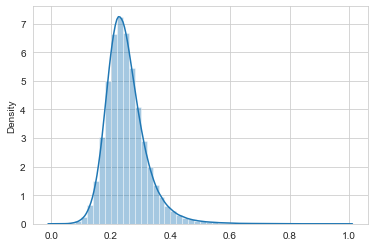

In [26]:
sns.distplot(volume_ratio)

主要落在0.1到0.3之間

In [27]:
scale_volume_5 = v.rolling(5).sum().div(v.rolling(5).sum().abs().sum(axis=1), axis=0)

In [28]:
scale_volume_20 = v.rolling(20).sum().div(v.rolling(20).sum().abs().sum(axis=1), axis=0)

In [29]:
scale_volume_ratio = scale_volume_5/scale_volume_20

In [30]:
scale_volume_ratio

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1.029966,1.037785,2.056066,1.058136,0.837446,0.680606,1.288115,1.324399,1.096849,0.925745,...,0.941280,0.958860,1.065141,1.573677,0.839786,0.959782,0.845944,0.687855,0.712062,1.033902
2022-08-25,0.916399,1.064715,2.117828,1.018313,0.832151,0.702564,1.216132,1.349470,1.121412,1.058152,...,0.872200,0.926126,1.024040,1.447641,0.846531,0.901919,0.854820,0.670551,0.767675,0.984457
2022-08-26,0.891768,0.974879,2.103044,1.042405,0.900572,0.655154,1.266029,1.330100,1.105954,1.167291,...,0.881112,0.910931,1.032944,1.482512,0.810916,0.908124,0.877610,0.715940,0.877794,1.008668


<AxesSubplot:ylabel='Density'>

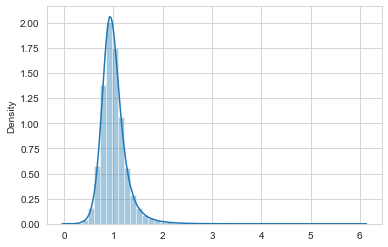

In [31]:
sns.distplot(scale_volume_ratio)

大致上符合假設(每天的成交量不會差太多)，兩個的比值主要落在1左右

# Q2: Check when do reverse_diff_rank >=0.5 <br>
when do volume_ratio >=0.25

In [32]:
reverse_diff_rank_date = reverse_diff_rank>=0.5

In [33]:
reverse_diff_rank_date

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-01-03,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-01-04,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2000-01-05,True,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,True,False
2000-01-06,True,False,False,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,True,False,True,True,True,True,False,True,True,True,...,False,True,False,True,True,True,True,False,False,True
2022-08-25,True,False,True,True,True,True,False,True,True,True,...,False,True,False,True,True,True,True,False,False,True
2022-08-26,False,False,True,False,True,False,False,True,True,True,...,False,False,False,False,True,True,False,False,False,False


In [34]:
reverse_diff_rank_date = reverse_diff_rank_date.replace({True: 1, False: 0})

In [35]:
reverse_diff_rank_date

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
2000-01-06,1,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1,0,1,1,1,1,0,1,1,1,...,0,1,0,1,1,1,1,0,0,1
2022-08-25,1,0,1,1,1,1,0,1,1,1,...,0,1,0,1,1,1,1,0,0,1
2022-08-26,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0


<AxesSubplot:xlabel='Date'>

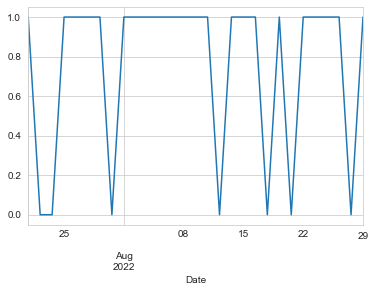

In [36]:
reverse_diff_rank_date['AAPL'][-30:-1].plot()

In [37]:
volume_ratio_date = volume_ratio>=0.25

In [38]:
volume_ratio_date = volume_ratio_date.replace({True: 1, False: 0})

In [39]:
volume_ratio_date

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0,0,1,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-08-25,0,0,1,0,0,0,1,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2022-08-26,0,0,1,0,0,0,1,1,1,1,...,0,0,0,1,0,0,0,0,0,0


In [40]:
intersect = reverse_diff_rank_date.mul(volume_ratio_date)

In [41]:
intersect

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,0,0,1,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
2022-08-25,0,0,1,0,0,0,0,1,1,0,...,0,0,0,1,0,0,0,0,0,0
2022-08-26,0,0,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [42]:
multiply = alpha_030 >=0.125

In [43]:
multiply.replace({True: 1, False: 0})

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,1,0,1,1,1,0,0,1,1,1,...,0,0,0,1,1,1,0,0,0,1
2022-08-25,0,0,1,0,1,0,0,1,1,1,...,0,0,0,1,1,1,0,0,0,0
2022-08-26,0,0,1,0,1,0,0,1,1,1,...,0,0,0,0,1,1,0,0,0,0


In [44]:
multiply = multiply.replace({True: 1, False: 0})

In [45]:
date_diff = intersect.sub(multiply)

In [46]:
date_diff

Ticker,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
1999-12-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-03,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-04,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-05,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2000-01-06,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-24,-1,0,0,-1,-1,0,0,0,-1,-1,...,0,0,0,0,-1,-1,0,0,0,-1
2022-08-25,0,0,0,0,-1,0,0,0,0,-1,...,0,0,0,0,-1,-1,0,0,0,0
2022-08-26,0,0,0,0,-1,0,0,0,0,0,...,0,0,0,0,-1,-1,0,0,0,0


# Q3: Check how long do Q2 hold?

https://stackoverflow.com/questions/43986045/count-consecutive-ones-in-a-dataframe-and-get-indices-where-this-occurs

In [47]:
trade_date = reverse_diff_rank_date.index.format(formatter=lambda x: x.strftime('%Y %m %d %H:%M.%S'))

In [48]:
duration_reverse_diff_rank_date = {}

In [49]:
for cname in reverse_diff_rank_date.columns:
    count = 0
    date = []
    for i in range(1,len(reverse_diff_rank_date[cname])-1):
        if reverse_diff_rank_date[cname][i]>0 :
            count +=1
            if reverse_diff_rank_date[cname][i-1] == 0:
                date.append("起始日" + trade_date[i])
        elif reverse_diff_rank_date[cname][i] ==0:
            if reverse_diff_rank_date[cname][i-1] > 0:
                date.append("結束日" + trade_date[i-1] + "總共持續" + f'{count} 天')
                count = 0
            else:
                continue
    duration_reverse_diff_rank_date[cname] = date

In [50]:
duration_reverse_diff_rank_date["AAPL"]

['起始日2000 01 06 00:00.00',
 '結束日2000 01 06 00:00.00總共持續1 天',
 '起始日2000 01 10 00:00.00',
 '結束日2000 01 13 00:00.00總共持續4 天',
 '起始日2000 01 25 00:00.00',
 '結束日2000 02 03 00:00.00總共持續8 天',
 '起始日2000 02 18 00:00.00',
 '結束日2000 02 18 00:00.00總共持續1 天',
 '起始日2000 02 28 00:00.00',
 '結束日2000 02 28 00:00.00總共持續1 天',
 '起始日2000 03 06 00:00.00',
 '結束日2000 03 09 00:00.00總共持續4 天',
 '起始日2000 03 14 00:00.00',
 '結束日2000 03 16 00:00.00總共持續3 天',
 '起始日2000 03 24 00:00.00',
 '結束日2000 04 06 00:00.00總共持續10 天',
 '起始日2000 04 10 00:00.00',
 '結束日2000 04 14 00:00.00總共持續5 天',
 '起始日2000 04 20 00:00.00',
 '結束日2000 04 25 00:00.00總共持續3 天',
 '起始日2000 04 28 00:00.00',
 '結束日2000 04 28 00:00.00總共持續1 天',
 '起始日2000 05 02 00:00.00',
 '結束日2000 05 11 00:00.00總共持續8 天',
 '起始日2000 05 15 00:00.00',
 '結束日2000 05 15 00:00.00總共持續1 天',
 '起始日2000 05 17 00:00.00',
 '結束日2000 05 31 00:00.00總共持續10 天',
 '起始日2000 06 12 00:00.00',
 '結束日2000 06 12 00:00.00總共持續1 天',
 '起始日2000 06 14 00:00.00',
 '結束日2000 06 14 00:00.00總共持續1 天',
 '起始日2000 06 16 00:00.

# 機率與條件機率

以下假設我們可以用去年一整年的發生機率來當作今年的判斷依據

1. P(reverse_diff_rank >=0.5) := $\frac{\text{number of days that reverse_diff_rank >=0.5 in a given year}}{\text{1 year}}$

For AAPL in 2021

In [51]:
reverse_diff_rank_date['AAPL']['2021']

Date
2021-01-04    1
2021-01-05    1
2021-01-06    1
2021-01-07    1
2021-01-08    1
             ..
2021-12-27    0
2021-12-28    1
2021-12-29    1
2021-12-30    1
2021-12-31    1
Name: AAPL, Length: 252, dtype: int64

In [52]:
len(reverse_diff_rank_date['AAPL']['2021'])

252

In [53]:
P_reverse_diff_rank_date = sum(reverse_diff_rank_date['AAPL']['2021'])/len(reverse_diff_rank_date['AAPL']['2021'])

In [54]:
P_reverse_diff_rank_date

0.5198412698412699

In [55]:
r['AAPL']['2021'].shift(-1)>0

Date
2021-01-04     True
2021-01-05    False
2021-01-06     True
2021-01-07     True
2021-01-08    False
              ...  
2021-12-27    False
2021-12-28     True
2021-12-29    False
2021-12-30    False
2021-12-31    False
Name: AAPL, Length: 252, dtype: bool

In [56]:
(reverse_diff_rank_date['AAPL']['2021'] == 1) & (r['AAPL']['2021'].shift(-1)>0) 

Date
2021-01-04     True
2021-01-05    False
2021-01-06     True
2021-01-07     True
2021-01-08    False
              ...  
2021-12-27    False
2021-12-28     True
2021-12-29    False
2021-12-30    False
2021-12-31    False
Name: AAPL, Length: 252, dtype: bool

P(stock price increases next day & reverse_diff_rank >=0.5) = $\frac{\text{number of days that reverse_diff_rank >=0.5 and stock price increse next day in a given year}}{\text{1 year}}$

In [57]:
intersect_date = sum((reverse_diff_rank_date['AAPL']['2021'] == 1) & (r['AAPL']['2021'].shift(-1)>0))

In [58]:
intersect_date

70

In [59]:
P_intersect = intersect_date/len(reverse_diff_rank_date['AAPL']['2021'])

In [60]:
P_intersect

0.2777777777777778

In [61]:
P_conditional = P_intersect/P_reverse_diff_rank_date

In [62]:
P_conditional

0.5343511450381679

在給定reverse_rank_date >= 0.5 的情況下，隔天股價上漲的機率大致為0.53

接著看其他變數的機率跟其他天數的機率

P(volume_ratio >=0.25) := $\frac{\text{number of days that volume_ratio >=0.25 in a given year}}{\text{1 year}}$

In [63]:
P_volume_ratio_date = sum(volume_ratio_date['AAPL']['2021'])/len(volume_ratio_date['AAPL']['2021'])

In [64]:
P_volume_ratio_date 

0.4444444444444444

P(stock price increases next day & volume_ratio >=0.25) = $\frac{\text{number of days that volume_ratio >=0.25 and stock price increse next day in a given year}}{\text{1 year}}$

In [65]:
intersect_volume_date = sum((volume_ratio_date['AAPL']['2021'] == 1) & (r['AAPL']['2021'].shift(-1)>0))

In [66]:
P_intersect_vol = intersect_volume_date/len(volume_ratio_date['AAPL']['2021'])

In [67]:
P_intersect_vol

0.23809523809523808

In [68]:
P_conditional_vol = P_intersect_vol/P_volume_ratio_date

In [69]:
P_conditional_vol 

0.5357142857142857

P(alpha_030 >=0.125) := $\frac{\text{number of days that alpha_030 >=0.125 in a given year}}{\text{1 year}}$

In [70]:
P_alpha_030_date = sum(multiply['AAPL']['2021'] == 1)/len(multiply['AAPL']['2021'])

In [78]:
sum(multiply['AAPL']['2021'] == 1)

125

In [71]:
P_alpha_030_date

0.49603174603174605

P(stock price increases next day & alpja_030 >=0.125) = $\frac{\text{number of days that alpja_030 >=0.125 and stock price increse next day in a given year}}{\text{1 year}}$

In [72]:
intersect_alpha_030 = sum((multiply['AAPL']['2021'] == 1) & (r['AAPL']['2021'].shift(-1)>0))

In [77]:
intersect_alpha_030

67

In [73]:
P_intersect_alpha_030 = intersect_alpha_030/len(multiply['AAPL']['2021'])

In [74]:
P_intersect_alpha_030

0.26587301587301587

In [75]:
P_conditional_alpha_030 = P_intersect_alpha_030/P_alpha_030_date

In [76]:
P_conditional_alpha_030

0.536